# Classification of fake news

I am using the dataset from Kaggle. I first want to retrieve this and convert it to a dataframe object

In [68]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)

In [85]:
# Importer det første datasæt
df1 = pd.read_csv("True.csv")
df2 = pd.read_csv("Fake.csv")

df = pd.concat([df1, df2], ignore_index=True)

X1 = np.array(df["text"])

# Lav target array, hvor 0 er en troværdig artikel og 1 er en utroværdig artikel
a = np.zeros(len(df1))
b = np.ones(len(df2))
y1 = np.hstack((a, b))

# Importer det andet datasæt
df_second = pd.read_csv("Train.csv")
X2 = np.array(df_second["text"])

y2 = np.array(df_second["label"])

# Saml datasættene til et stort datasæt
X = np.append(X1, X2)
y = np.hstack((y1, y2))
print(np.size(y))

65698


In [87]:
import re
from nltk.stem import PorterStemmer
ps = PorterStemmer()
failed_files = []
corpus = []
for i, text in enumerate(X):
    if i % 500 == 0:
        print(i)
    # try-statement benyttes, da nogen artikler blot indeholder nan, hvilket vil give fejl senere
    try:
        text_oa = re.sub("[^a-zA-Z]", " ", text)

        text_oa = text_oa.lower()
        text_oa = text_oa.split()

        # stopwords filtreres fra og artikler med 5 eller færrere ord tilbage fjernes, da vi ikke mener at de bidrager
        # til opfattelsen af fake news. Dette hjælper også til at undgå fejl senere

        filtered_article = [ps.stem(w) for w in text_oa if w not in stop_words and len(w) > 1]
        if len(filtered_article) > 5:
            corpus.append(" ".join(filtered_article))
        else:
            failed_files.append(i)
    except TypeError:
        failed_files.append(i)

# Tilpas target, da nogen artikler er blevet fjernet
print(np.shape(y))
y = np.delete(y, failed_files)
print(np.shape(y))

print(len(X))
print(len(corpus))

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
20000
20500
21000
21500
22000
22500
23000
23500
24000
24500
25000
25500
26000
26500
27000
27500
28000
28500
29000
29500
30000
30500
31000
31500
32000
32500
33000
33500
34000
34500
35000
35500
36000
36500
37000
37500
38000
38500
39000
39500
40000
40500
41000
41500
42000
42500
43000
43500
44000
44500
45000
45500
46000
46500
47000
47500
48000
48500
49000
49500
50000
50500
51000
51500
52000
52500
53000
53500
54000
54500
55000
55500
56000
56500
57000
57500
58000
58500
59000
59500
60000
60500
61000
61500
62000
62500
63000
63500
64000
64500
65000
65500
(65698,)
(64539,)
65698
64539


In [131]:
print(len(corpus))

64539


In [133]:
# Corpus for datasættet omdannes til en bag of words
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(corpus)

print("Vocabulary size: {}".format(len(vect.vocabulary_)))

Vocabulary size: 157735


In [135]:
# Undersøg parametre for bag_of_words
feature_names = vect.get_feature_names()
print("Number of features: {}".format(len(feature_names)))
print("Every 2000th feature:\n{}".format(feature_names[::2000]))

Number of features: 157735
Every 2000th feature:
['aa', 'afir', 'allnewspipelin', 'antibiot', 'ashkenazim', 'azzad', 'bazhina', 'bfwogsdli', 'boghossian', 'brocksmith', 'callerbut', 'cemment', 'christiebooktitl', 'colickey', 'cornczech', 'cursor', 'decirlo', 'dhati', 'dominski', 'dystrophin', 'embl', 'esquadra', 'fallist', 'fisherhil', 'fremmed', 'gbmnyc', 'glaciologist', 'grigoropoulo', 'hambley', 'henni', 'hongcai', 'ideologicznej', 'inni', 'iwmqedylyxhiem', 'jinx', 'kalvin', 'khazar', 'koryto', 'landofthefre', 'lgm', 'losgoy', 'maison', 'masum', 'memel', 'miradoreltd', 'moschochor', 'mzu', 'netti', 'nonpregn', 'ocx', 'ortel', 'paraffin', 'perserver', 'plush', 'preponder', 'purpos', 'raiwind', 'registado', 'rickscott', 'rrikrvwon', 'sandersdown', 'scribbl', 'shana', 'simplex', 'solnick', 'stapler', 'suffic', 'taillef', 'testament', 'tishomingo', 'triabl', 'tyrannei', 'unphas', 'vcf', 'void', 'weei', 'wkzcm', 'xxwq', 'zander']


In [107]:
# Da der tydeligvis er mange ord, der ikke giver mening benytter vi en indbygget parameter til at bestemme,
# at ord skal optræde i minimum 3 dokumenter for at blive godtaget i vores bag og words
vect = CountVectorizer(min_df=3).fit(corpus)
print("Vocabulary size: {}".format(len(vect.vocabulary_)))

feature_names = vect.get_feature_names()
print("Number of features: {}".format(len(feature_names)))
print("Every 500th feature:\n{}".format(feature_names[::1000]))

Vocabulary size: 54068
Number of features: 54068
Every 500th feature:
['aa', 'akkuyu', 'antichrist', 'audienc', 'battisti', 'bittman', 'brethren', 'canelli', 'cheapskat', 'coder', 'cortison', 'dal', 'designe', 'dontholdupthelin', 'ehud', 'establec', 'feeheri', 'fountain', 'gelbard', 'graft', 'handbook', 'hilstrom', 'ibex', 'intercom', 'jetstar', 'keitholbermann', 'kumailn', 'lew', 'lustig', 'masharipov', 'metropoli', 'montant', 'naruhito', 'noncombat', 'oneunit', 'papp', 'phish', 'povo', 'puzzler', 'receptionist', 'ricci', 'ryol', 'scotttaylorva', 'shibley', 'smother', 'staley', 'superdom', 'telecinco', 'tomlinsoncj', 'twiter', 'unsavori', 'viewpoint', 'wengui', 'wzpqcoaajqvz', 'zuckerman']


In [108]:
# Dataen transformeres
bag_of_words = vect.transform(corpus)
print("bag_of_words: {}".format(repr(bag_of_words)))

# Dataen opdeles nu i en træningsdel og en testdel
from sklearn.model_selection import train_test_split

# Datasæt 1
X_train, X_test, y_train, y_test = train_test_split(bag_of_words, y, random_state=0)
print("Training articles: {}\nTest articles: {}".format(np.size(y_train), np.size(y_test)))

bag_of_words: <64539x54068 sparse matrix of type '<class 'numpy.int64'>'
	with 11741370 stored elements in Compressed Sparse Row format>
Training articles: 48404
Test articles: 16135


In [109]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000).fit(X_train, y_train)
print("Dataset 1 training score: {}".format(log_reg.score(X_train, y_train)))
print("Dataset 1 test score: {}".format(log_reg.score(X_test, y_test)))

Dataset 1 training score: 0.9997727460540451
Dataset 1 test score: 0.962751781840719


In [110]:
# Jeg tester modellens generaliseringspotentiale med cross-validation på datasættet.
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg, bag_of_words, y, cv=5)
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.95


In [97]:
!pip install mglearn

  Using cached mglearn-0.1.9.tar.gz (540 kB)
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=eec37a0474f8190eed66a417ec47a5b28b3308e1f22b2eeef82ba2e3f4c8af35
  Stored in directory: c:\users\alexander\appdata\local\pip\cache\wheels\87\75\37\404e66d0c4bad150f101c9a0914b11a8eccc2681559936e7f7
Successfully built mglearn


In [99]:
# Jeg prøver at lave en tfidf-repræsentation af min bag_of_words,
# sådan så jeg kan vurdere hvilke ord modellen lægger mest vægt på.
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
%matplotlib inline

In [115]:
# Opret en bag of words som er skaleret i forhold til tf og idf. Fjern ord, der ikke optræder i mindst 5 dokumenter
vect = TfidfVectorizer(min_df=5)
vect.fit(corpus)
tfidf = vect.transform(corpus)

# Jeg tester modellens generaliseringspotentiale med cross-validation på datasættet.
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg, tfidf, y, cv=5)
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.93


In [116]:
# Find de features der har lavest og højest tfidf værdi i datasættet. Dette giver et bud om hvilke
# ord der bør være mest informative om en artikels indhold
max_value = tfidf.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
feature_names = np.array(vect.get_feature_names())

print("Feature names with lowest tfidf score:\n{}".format(feature_names[sorted_by_tfidf[:20]]))
print("Feature names with highest tfidf score:\n{}".format(feature_names[sorted_by_tfidf[-20:]]))

Feature names with lowest tfidf score:
['alis' 'geopol' 'dominant' 'crimescap' 'sencillo' 'paradigma' 'planetoid'
 'contol' 'taquiyya' 'tractabl' 'milkman' 'jeantel' 'springbreak'
 'babtist' 'hickox' 'heteron' 'sudaf' 'dontholdupthelin' 'sportsplac'
 'smurfdom']
Feature names with highest tfidf score:
['fluorid' 'petrov' 'sibur' 'hemp' 'spieth' 'pavarotti' 'pumpkin'
 'bitcoin' 'coyot' 'sh' 'magnesium' 'wikileak' 'chakra' 'schiaparelli'
 'iodin' 'scotusblog' 'donkey' 'case' 'counti' 'rt']


In [126]:
# Denne kode er taget direkte fra "Introduction to machine learning with python"
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
pipe = make_pipeline(TfidfVectorizer(min_df=5, norm=None),
                    LogisticRegression(max_iter=1000))
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(corpus, y)
print("done")

done


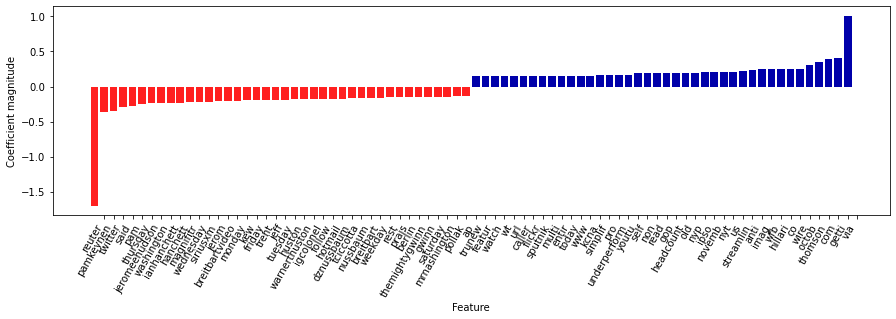

In [128]:
# Hent feature names og lav plot
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
feature_names = np.array(vectorizer.get_feature_names())
import mglearn
mglearn.tools.visualize_coefficients(grid.best_estimator_.named_steps["logisticregression"].coef_,
                                     feature_names, n_top_features=40)